# lab2: Regularization

## 1. load data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
data = pd.read_csv('ex2data2.txt')
print('data.shape = ' + str(data.shape))
X = np.array(data.iloc[:,0:2])
y = np.array(data.iloc[:,2])
print('X.shape = ' + str(X.shape))
print('y.shape = ' + str(y.shape))

data.shape = (117, 3)
X.shape = (117, 2)
y.shape = (117,)


In [3]:
m = X.shape[0]
n = X.shape[1]
X = np.hstack((np.ones((m,1)), X))
print('X.shape = ' + str(X.shape))

X.shape = (117, 3)


In [4]:
def plotData(X, y):
    k1 = (y==1)
    k2 = (y==0)
    plt.scatter(X[k1,0], X[k1,1], c='r',marker='+')
    plt.scatter(X[k2,0], X[k2,1], c='b',marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])

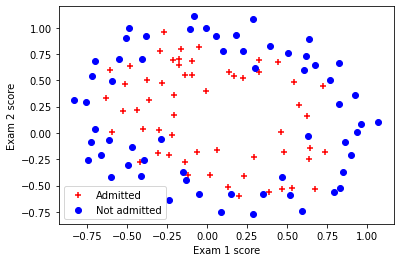

In [5]:
plotData(X[:,1:3], y)
plt.show()

## 2. map feature
$$
mapX = [1, X_1^1X_2^0, X_1^0X_2^1, X_1^2X_2^0, X_1^1X_2^1, X_1^0X_2^2,...]
$$

In [6]:
def mapFeature(X1, X2):
    degree = 6
    m = X1.shape[0]
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            tmp = (X1**(i-j)) * (X2**j)
            tmp = tmp.reshape((m,1))
            out = np.hstack((out, tmp))
    return out

In [7]:
mapX = mapFeature(X[:,1], X[:,2])
print(mapX.shape)

(117, 28)


## 3. cost and gradient
$$
g(z)=\frac{1}{1+e^{-z}} 
$$
$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta^2
$$
`for j = 0`
$$
\frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m}\sum_{i=1}^{m} [(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j]
$$
`for j >= 1`
$$
\frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m}\sum_{i=1}^{m} [(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j]+\frac{\lambda}m\theta_j
$$

In [8]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [9]:
def costFunction(theta, X, y, lambd):
    '''compute cost
    args:
        X - X.shape = (m,n)
        theta - theta.shape = (n,1)
        y - y.shape = (m,1)
        lambd - avoid conflicting with python lambda
    return:
        J - the cost
    '''
    m = X.shape[0]
    n = X.shape[1]
    theta = theta.reshape((n,1))    
    y = y.reshape((m,1))
    # print(X)
    # print(theta)
    # print(np.matmul(X, theta))
    h = sigmoid(np.dot(X, theta))

    term1 = y * np.log(h)
    term2 = (1-y) * np.log(1-h)
    J = np.sum(- term1 - term2) / m + np.sum(theta**2) * lambd / (2*m)
    return J

In [10]:
def gradient(theta, X, y, lambd):
    '''compute gradient
    args:
        X - X.shape = (m,n)
        theta - theta.shape = (n,1)
        y - y.shape = (m,1)
        lambd - avoid conflicting with python lambda
    return:
        grade - the gradient
    '''
    m = X.shape[0]
    n = X.shape[1]
    theta = theta.reshape((n,1))    
    y = y.reshape((m,1))
    h = sigmoid(np.dot(X, theta))

    tmp = np.sum((h-y)*X, axis=0) / m
    tmp = tmp.reshape(theta.shape)
    grade = tmp + lambd / m * theta
    grade[0] = grade[0] - lambd / m * theta[0]

    return grade

In [11]:
init_theta = np.zeros((mapX.shape[1], 1))
test_theta = np.ones((mapX.shape[1], 1))
lamba = 1

grade = gradient(test_theta, mapX, y, 10)
cost = costFunction(test_theta, mapX, y, 10)
print('cost = ' + str(cost))
grade

cost = 3.233954577547915


array([[0.34933306],
       [0.16274793],
       [0.19669176],
       [0.22880265],
       [0.09298543],
       [0.246636  ],
       [0.14461774],
       [0.10936917],
       [0.10319716],
       [0.18514965],
       [0.1750132 ],
       [0.08800132],
       [0.11923867],
       [0.08658281],
       [0.20173702],
       [0.13638231],
       [0.09578703],
       [0.09436413],
       [0.10065111],
       [0.09218684],
       [0.17640223],
       [0.15083266],
       [0.08752741],
       [0.09982281],
       [0.08604875],
       [0.10277787],
       [0.08522706],
       [0.18387992]])

## 4. predict

In [12]:
result = op.minimize(fun=costFunction, x0=init_theta, args=(mapX, y, lamba), method='TNC', jac=gradient)
optimal_theta = result.x
optimal_theta

array([ 1.24280176,  0.60967415,  1.15608439, -1.97843866, -0.8767824 ,
       -1.39458537,  0.12769331, -0.33289355, -0.35736008, -0.178417  ,
       -1.44852936, -0.05641343, -0.60465735, -0.25286781, -1.17709603,
       -0.22363555, -0.19640318, -0.05937633, -0.2636114 , -0.27878838,
       -0.44883549, -1.02604306,  0.02315022, -0.29419648,  0.01002652,
       -0.32083614, -0.12251267, -0.90346667])

In [13]:
def predict(theta, X):
    m = X.shape[0]
    pred = np.zeros((m,1))
    h = sigmoid(np.dot(X, theta))
    pred[h>=0.5] = 1
    return pred.flatten()

In [14]:
p = predict(optimal_theta, mapX)
print('Train accuracy = {}%'.format(100 * np.mean(p==y)) )

Train accuracy = 82.90598290598291%


## 5. plot boundary

In [15]:
def plotDecisionBoundary(theta, X, y):
    plotData(X[:,1:3], y)
    
    u = np.arange(-1, 1.5, 0.05).reshape((-1,1))
    v = np.arange(-1, 1.5, 0.05).reshape((-1,1))
    U, V = np.meshgrid(u, v)
    print(U.shape)
    print(V.shape)
    z = np.zeros((len(u),len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeature(u[i], v[j]), theta)
    print(z.shape)
    plt.contour(U,V,z,levels=0)

(50, 50)
(50, 50)
(50, 50)


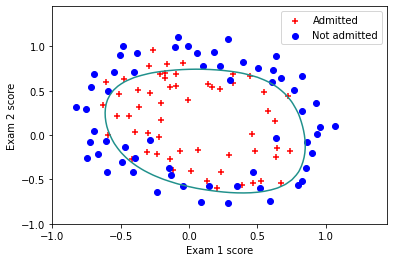

In [16]:
plotDecisionBoundary(optimal_theta, mapX, y)
plt.show()